# ✅ Important EDA Tasks You Should Practice

Here’s a checklist of functions and steps you must perform during EDA:

1. Load the Dataset
Use: pandas.read_csv() or other appropriate loader.

2. Basic Information
df.head() – View first few rows

df.tail() – Last few rows

df.shape – Rows & columns

df.info() – Column types & non-null info

df.describe() – Summary statistics

3. Check for Missing Values
df.isnull().sum()

4. Check for Duplicates
df.duplicated().sum()

5. Data Types & Conversion
df.dtypes

Convert types where needed: pd.to_datetime(), .astype()

6. Univariate Analysis
Histograms: df['col'].hist()

Value counts: df['col'].value_counts()

Boxplot for outliers: sns.boxplot(x='col', data=df)

7. Bivariate Analysis
Correlation: df.corr()

Heatmap: sns.heatmap(df.corr(), annot=True)

Scatter plots: sns.scatterplot(x='col1', y='col2')

Grouping: df.groupby('col').mean()

8. Outliers Detection
Use boxplots or z-scores

from scipy import stats

z = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

9. Data Distribution
Histograms / KDE plots using Seaborn

sns.histplot(df['col'])

sns.kdeplot(df['col'])

10. Categorical Analysis
Countplots: sns.countplot(x='col', data=df)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [4]:
#Load the Dataset Use: pandas.read_csv() or other appropriate loader
url ='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df =pd.read_csv(url)

In [5]:
#Basic Information df.head() – View first few rows
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#df.tail() – Last few rows
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
#df.shape – Rows & columns
df.shape

(891, 12)

In [12]:
#df.info() – Column types & non-null info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#df.describe() – Summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#Check for Missing Values df.isnull().sum()

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
# 1. Fill 'Age' with its mean (Age is numerical)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# 2. Fill 'Cabin' and 'Embarked' with their mode (most frequent value)

df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#after fillna 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [30]:
#Check for Duplicates df.duplicated().sum()
df.duplicated().sum()

0

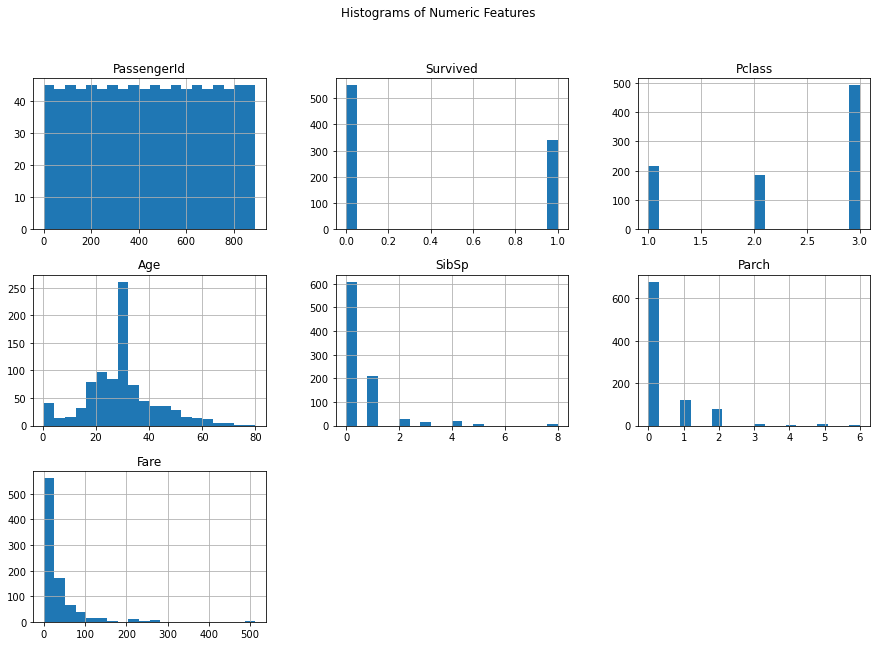

In [56]:
# 📌 7. Distribution of Numeric Features

#for sigle colum
#df['Age'].hist(figsize=(15, 10), bins=20)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()


In [48]:
df[num_cols].value_counts()

PassengerId  Survived  Pclass  Age        SibSp  Parch  Fare  
1            0         3       22.000000  1      0      7.250     1
599          0         3       29.699118  0      0      7.225     1
588          1         1       60.000000  1      1      79.200    1
589          0         3       22.000000  0      0      8.050     1
590          0         3       29.699118  0      0      8.050     1
                                                                 ..
301          1         3       29.699118  0      0      7.750     1
302          1         3       29.699118  2      0      23.250    1
303          0         3       19.000000  0      0      0.000     1
304          1         2       29.699118  0      0      12.350    1
891          0         3       32.000000  0      0      7.750     1
Length: 891, dtype: int64

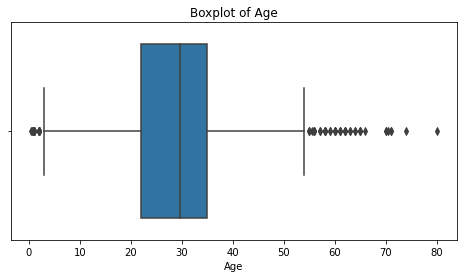

In [43]:
#  Boxplots to Check Outliers
#for col in ['Age', 'Fare']:

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title(f"Boxplot of Age")
plt.show()

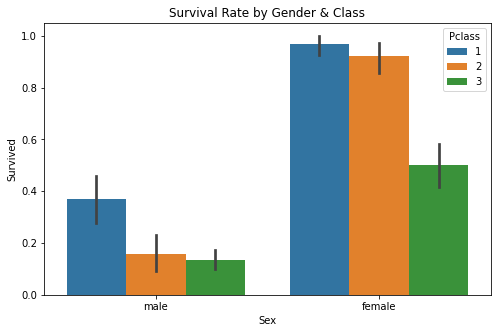

In [41]:
# Survival by Gender & Class
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.title("Survival Rate by Gender & Class")
plt.show()

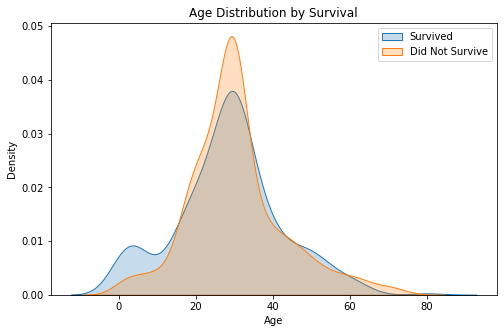

In [44]:
# 📌 11. Age Distribution by Survival
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

<AxesSubplot:>

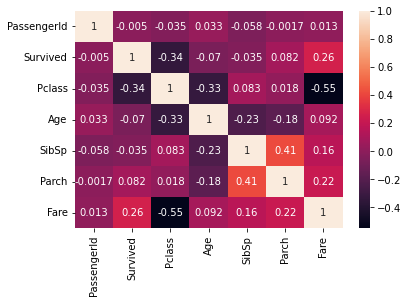

In [49]:
df.corr()
sns.heatmap(df.corr(), annot=True)